In [1]:
import pandas as pd
import scipy.io
import scipy.signal as ss
import pywt
import glob
import matplotlib.pyplot as plt
import scaleogram as scg
from scaleogram import cws
import numpy as np
from math import *
import os

In [2]:
print(os.getcwd())
os.chdir("..")

E:\git\HeartResearch\Data Preprocessing


In [3]:
main_data_dir = os.getcwd() + "\Data set"
print(os.listdir(main_data_dir))

['Gaussian_Filter', 'Label.csv', 'Median_Filter', 'Output', 'Output.png', 'README.md', 'Scaleogram_512_256', 'Segmentation', 'TrainingSet1', 'TrainingSet2', 'TrainingSet3']


In [4]:
data_mat_files = glob.glob(main_data_dir + "/TrainingSet*/*")
label_path = main_data_dir + "/Label.csv"
label_df = pd.read_csv(label_path)

In [6]:
label_df

,Recording,First_label,Second_label,Third_label
0,A0001,5,NaN,NaN
1,A0002,1,NaN,NaN
2,A0003,2,NaN,NaN
3,A0004,2,NaN,NaN
4,A0005,7,NaN,NaN
...,...,...,...,...
6872,A6873,3,NaN,NaN
6873,A6874,8,NaN,NaN
6874,A6875,4,NaN,NaN
6875,A6876,2,NaN,NaN


In [12]:
label_df.drop(['Second_label', 'Third_label'], axis=1)

,Recording,First_label
0,A0001,5
1,A0002,1
2,A0003,2
3,A0004,2
4,A0005,7
...,...,...
6872,A6873,3
6873,A6874,8
6874,A6875,4
6875,A6876,2


In [13]:
label = label_df['First_label'].tolist()

In [5]:
def data_extract(signal_raw_list, start_point):
    signal_list = []
    signal_number_list = []
    
    for signal in signal_raw_list:
        mat = scipy.io.loadmat(signal)
        signal_list.append(mat['ECG'][0][0][2][:,start_point:])
        signal_number = signal.split('\\')[-1].split('.')[0]
        signal_number_list.append(signal_number)

    return (signal_list, signal_number_list)

signal_list, signal_number = data_extract(data_mat_files, 300)

In [35]:
segment_file_name = "{}_lead{}_seg{}.mat"
# segment_list = []
segment_name_list = []
label_list = []

def segmentation(signal_list, seg_len):
    for i in range(len(signal_list)):
        for j in range(12):
            sig_len = len(signal_list[i][j])
            seg_num = ceil(sig_len/seg_len)
            for w in range(1,seg_num+1):
                x = floor((sig_len-seg_len)/(seg_num-1)*(w-1))
                segment = signal_list[i][j][x:x+1600]
                save_dic_data = {"ECG_segment": segment}
#                 segment_list.append(segment)
                label_list.append(label[i])
                segment_name_list.append(segment_file_name.format(signal_number[i], j+1, w))
#                 scipy.io.savemat(main_data_dir + "\Segmentation\{}_lead{}_seg{}.mat".format(signal_number[i], j+1, w), save_dic_data)
    seg_label_df = pd.DataFrame(list(zip(segment_name_list, label_list)), columns = ['Segment', 'Label'])  
    return seg_label_df

In [36]:
# seg_label_df = segmentation(signal_list,1600)

In [37]:
# seg_label_df.to_csv(main_data_dir + "\Segment_label.csv")

In [24]:
def median_filter(signal_raw_list):
    median_fil_list = []

    for signal in signal_raw_list:
        median_fil = ss.medfilt(signal)
        median_fil_list.append(median_fil)    
    return median_fil_list
    
median_fil_list = median_filter(signal_list)

MemoryError: Unable to allocate 1.58 MiB for an array with shape (12, 17254) and data type float64

In [22]:
def save_data_filter(data, signal_number, folder):
    for i in range(len(data)):
        save_dic_data = {"ECG": data[i]}
        scipy.io.savemat("E:\git\HeartResearch\Data set\{}\{}.mat".format(folder,signal_number[i]), save_dic_data)

In [8]:
save_data_filter(median_fil_list, signal_number, folder = "Median_Filter")

In [10]:
output_path = main_data_dir + "\Scaleogram_512_256\{}_{}_{}"
scg.set_default_wavelet('morl')
px = 1/plt.rcParams['figure.dpi']
lead = ['I','II','III','aVR','aVL','aVF','V1','V2','V3','V4','V5','V6']

def scaleogram(data, folder, signal_length):
    for i in range(len(data)):
        for j in range(len(lead)):
            
#             signal_length = 1600
            # range of scales to perform the transform
            scales = scg.periods2scales(np.arange(1, signal_length+1))
            x_values_wvt_arr = range(0,len(data[i][j]),1)

            # plot the signal 
            fig1, ax1 = plt.subplots(1, 1, figsize=(9, 3.5));  
            ax1.plot(x_values_wvt_arr, data[i][j], linewidth=3, color='blue')
            ax1.set_xlim(0, signal_length)
            ax1.set_title("ECG")

            # the scaleogram
            fig = cws(data[i][j][:signal_length], scales=scales, figsize=(512*px, 256*px), coi = False)
            print(fig)
            plt.axis('off')
#             plt.savefig(output_path.format(folder, signal_number[i],lead[j]), bbox_inches='tight', pad_inches = 0)

AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_81032\964922597.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig1, ax1 = plt.subplots(1, 1, figsize=(9, 3.5));


AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)


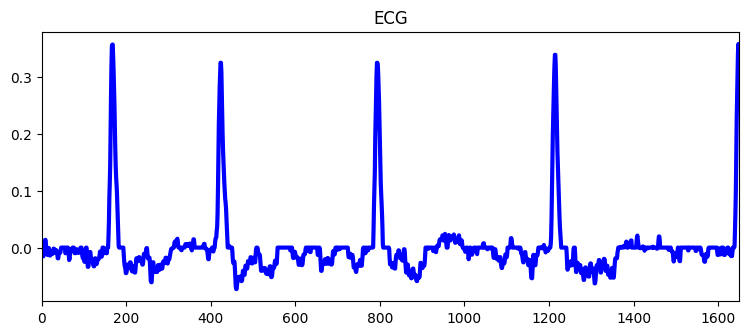

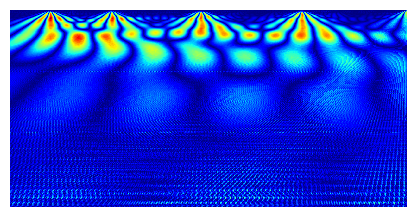

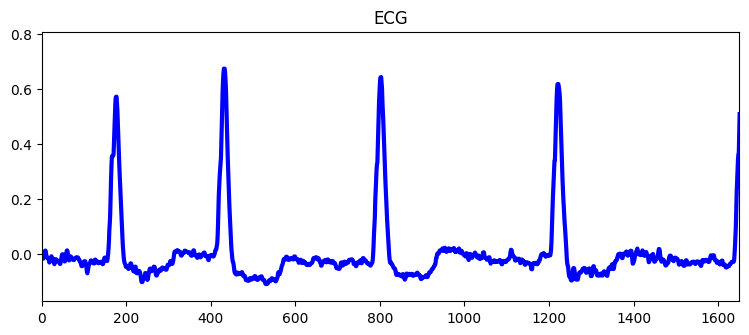

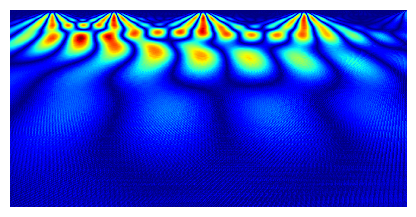

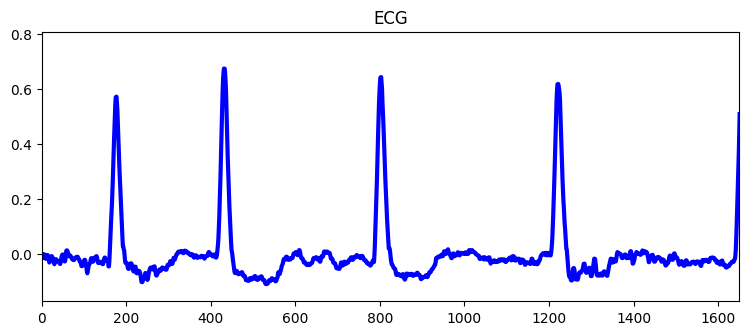

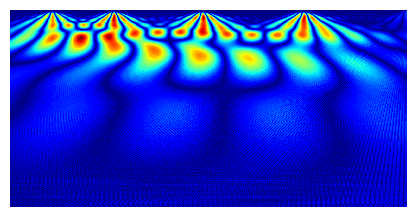

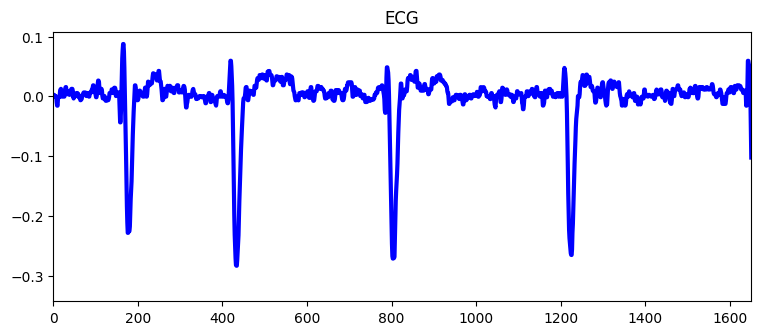

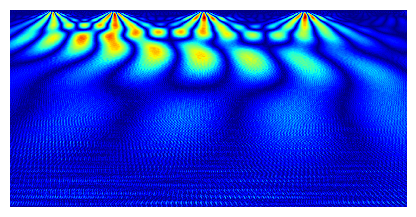

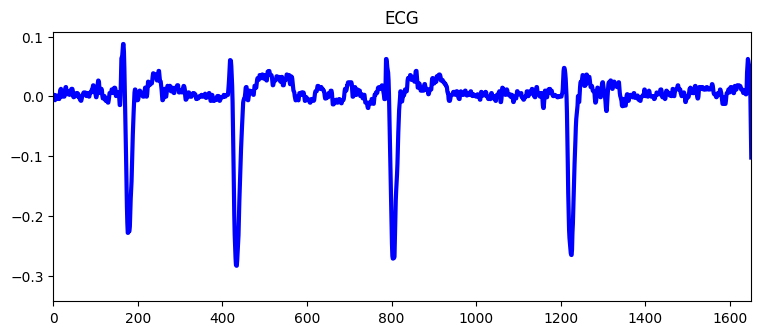

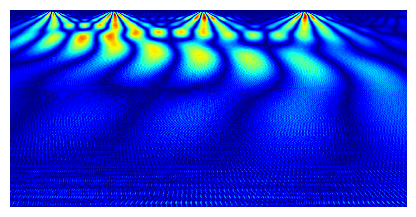

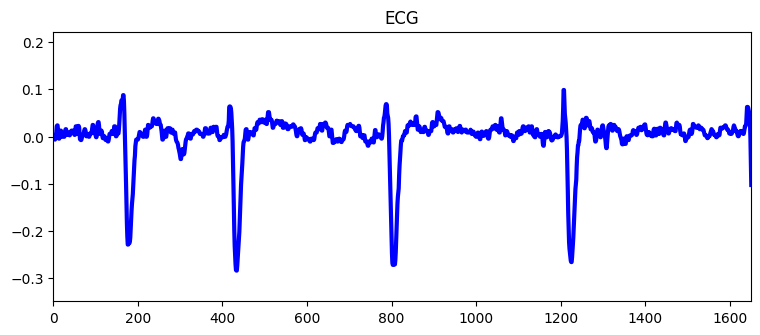

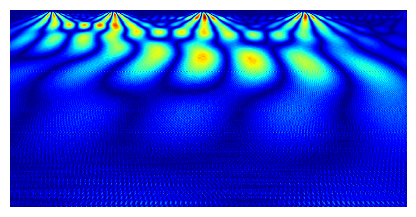

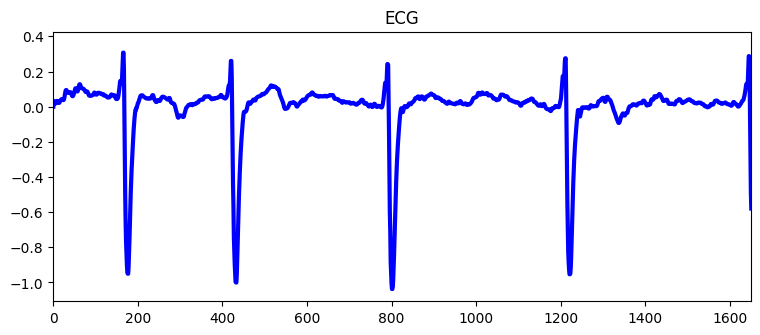

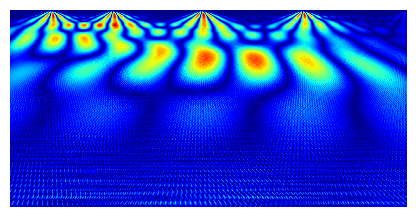

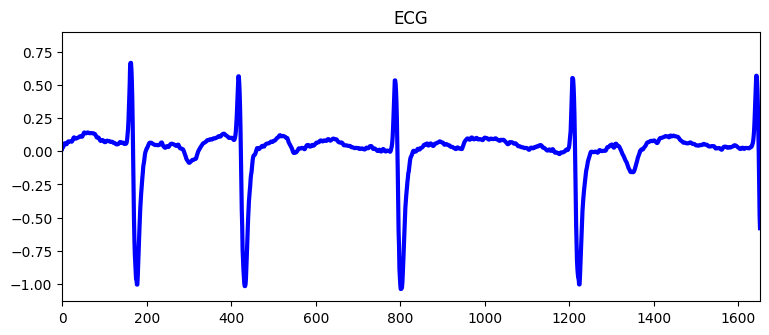

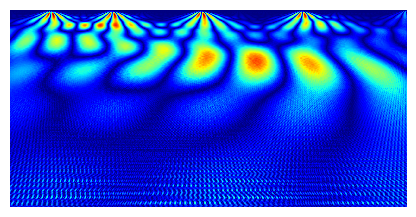

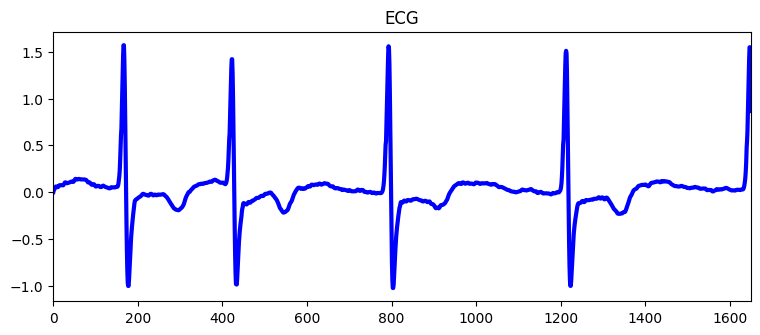

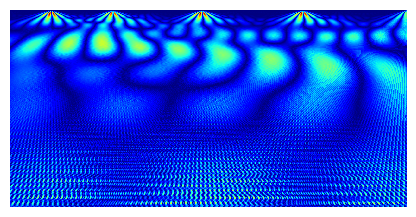

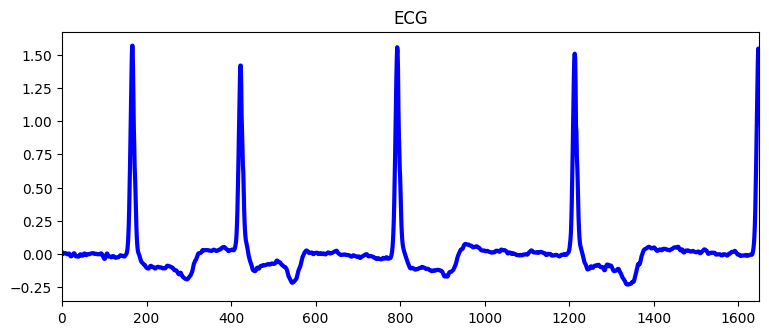

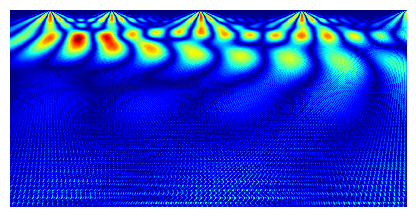

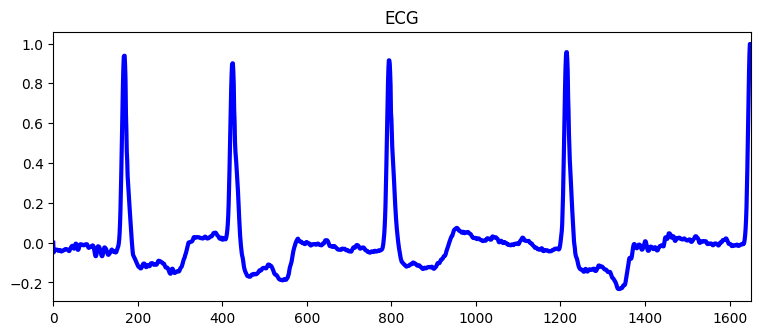

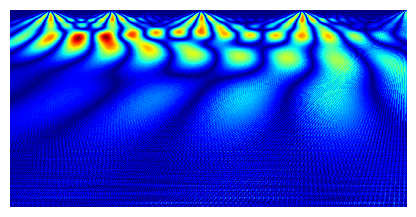

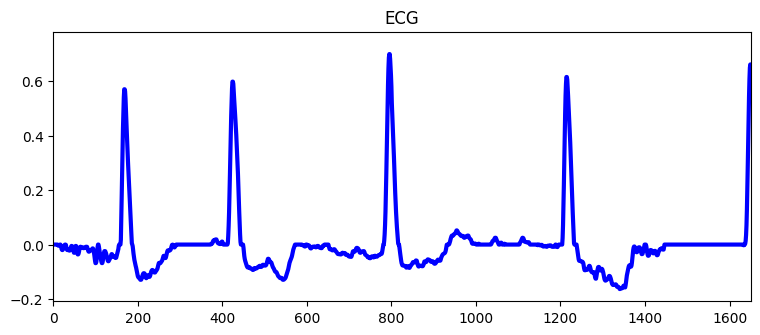

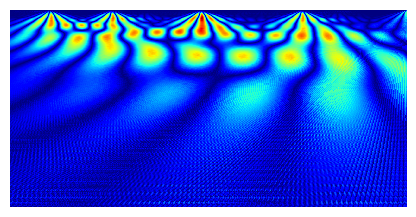

In [19]:
scaleogram(median_fil_list[60:61], folder = "Median_Filter", signal_length=1650)

In [7]:
def gaussian_filter(signal_raw_list, std):
    gauss_filt = []
    n_bins = signal_raw_list.shape[2]
    M = n_bins - 1 if n_bins % 2 == 0 else n_bins
    window = ss.gaussian(M, std = std)

    for signal in signal_raw_list:
        for i in range(signal.shape[0]):
            gauss_filter = ss.convolve(signal[i], window, mode='same', method='auto')
            gauss_filt.append(gauss_filter)    
    return gauss_filt

In [8]:
gauss_filt = gaussian_filter(signal_list, std=1)

In [17]:
gauss_filt_array = (np.array(gauss_filt)).reshape(6877,12,3000)
gauss_filt_list = []
for i in range(gauss_filt_array.shape[0]):
    gauss_filt_list.append(gauss_filt_array[i])

In [23]:
folder = "Gaussian_Filter"
save_data_filter(gauss_filt_list, signal_number, folder)

In [42]:
(np.array(signal_list).shape

SyntaxError: invalid syntax (613659903.py, line 1)

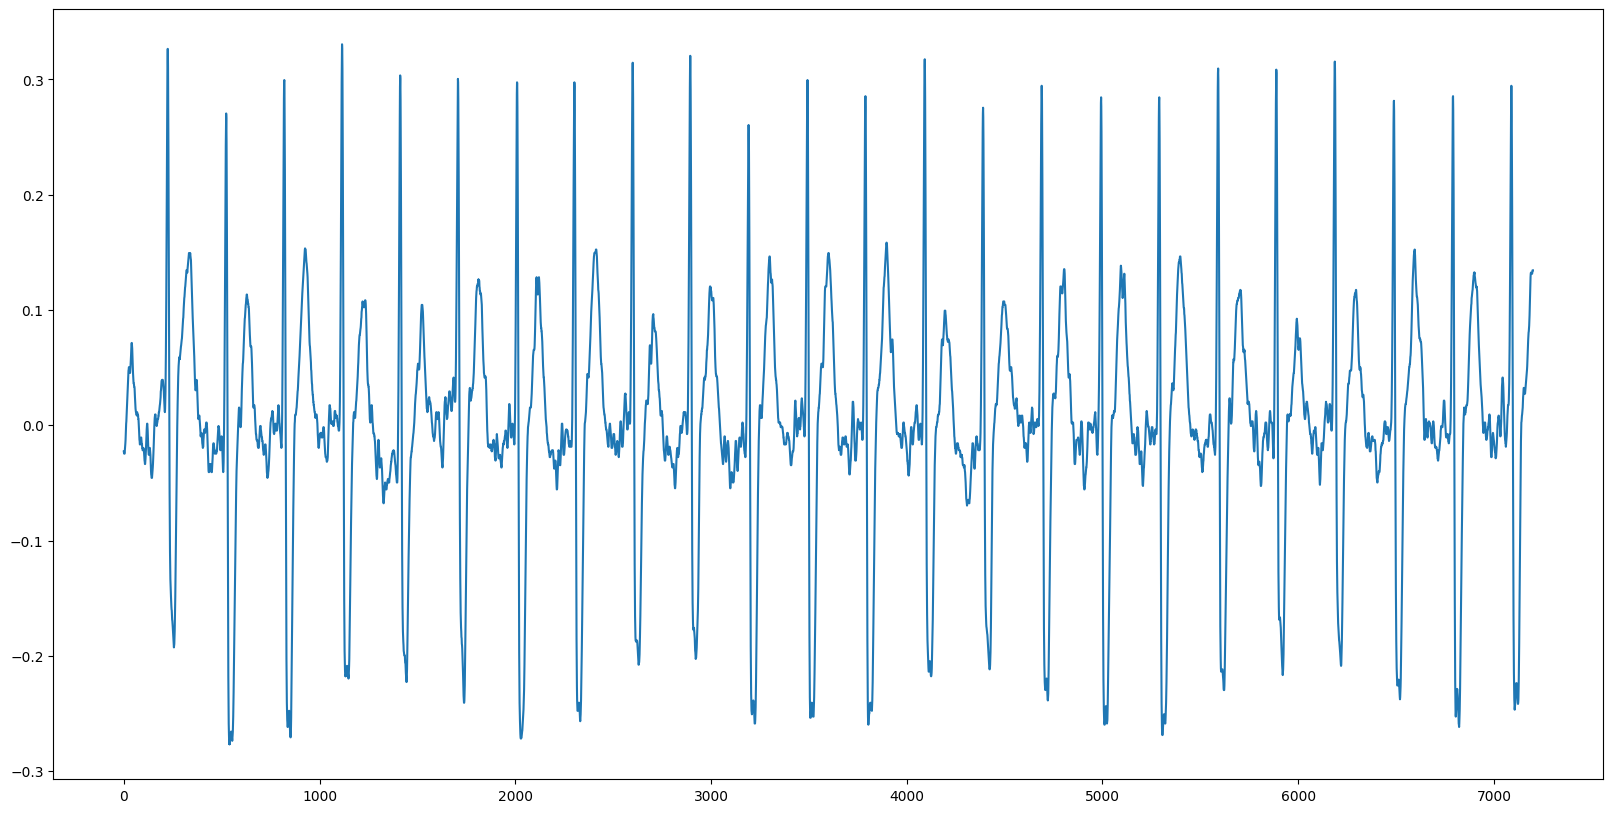

In [49]:
plt.figure(figsize=(20,10))
plt.plot(signal_list[0][4])

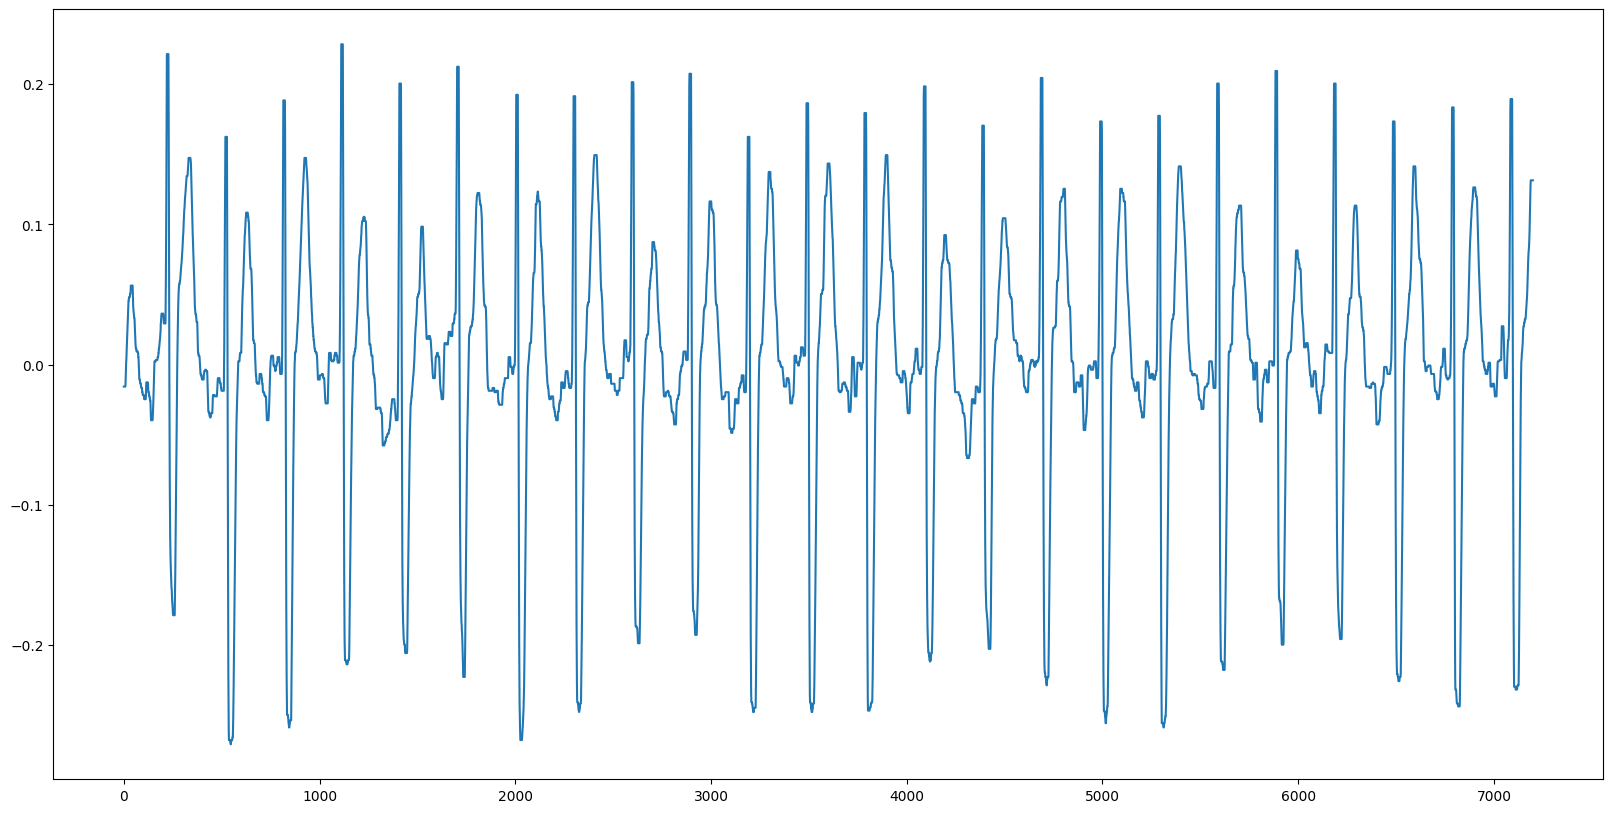

In [57]:
plt.figure(figsize=(20,10))
y = ss.medfilt(signal_list[0][4], 17)
plt.plot(y)